<a href="https://colab.research.google.com/github/mzaoualim/Business_Proposals/blob/main/Sales_Dashboard/steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal

Implement an Interactive Dashboard to analyse Sales by features and over multiple time horizons.

In [1]:
# loading modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import datetime

In [ ]:
# loading data
from google.colab import files
files.upload()

In [3]:
# reading the dataset
data = pd.read_csv('/content/data.xls')

In [4]:
# data sneak peak
data.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [5]:
# columns list
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [6]:
# select useful columns
cols = ['City', 'Customer type', 'Gender',
        'Product line', 'Total', 'Date', 'Time', 'Payment',
        'Rating']
data = data[cols]

In [7]:
data

,City,Customer type,Gender,Product line,Total,Date,Time,Payment,Rating
0,Yangon,Member,Female,Health and beauty,548.9715,1/5/2019,13:08,Ewallet,9.1
1,Naypyitaw,Normal,Female,Electronic accessories,80.2200,3/8/2019,10:29,Cash,9.6
2,Yangon,Normal,Male,Home and lifestyle,340.5255,3/3/2019,13:23,Credit card,7.4
3,Yangon,Member,Male,Health and beauty,489.0480,1/27/2019,20:33,Ewallet,8.4
4,Yangon,Normal,Male,Sports and travel,634.3785,2/8/2019,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...
995,Naypyitaw,Normal,Male,Health and beauty,42.3675,1/29/2019,13:46,Ewallet,6.2
996,Mandalay,Normal,Female,Home and lifestyle,1022.4900,3/2/2019,17:16,Ewallet,4.4
997,Yangon,Member,Male,Food and beverages,33.4320,2/9/2019,13:22,Cash,7.7
998,Yangon,Normal,Male,Home and lifestyle,69.1110,2/22/2019,15:33,Cash,4.1


In [8]:
# fixing the date and time columns
data['DateTime'] = data['Date']+ 'T' +data['Time']
data['DateTime'] = pd.to_datetime(data['DateTime'])
data.drop(columns=['Date', 'Time'], inplace=True)
data

,City,Customer type,Gender,Product line,Total,Payment,Rating,DateTime
0,Yangon,Member,Female,Health and beauty,548.9715,Ewallet,9.1,2019-01-05 13:08:00
1,Naypyitaw,Normal,Female,Electronic accessories,80.2200,Cash,9.6,2019-03-08 10:29:00
2,Yangon,Normal,Male,Home and lifestyle,340.5255,Credit card,7.4,2019-03-03 13:23:00
3,Yangon,Member,Male,Health and beauty,489.0480,Ewallet,8.4,2019-01-27 20:33:00
4,Yangon,Normal,Male,Sports and travel,634.3785,Ewallet,5.3,2019-02-08 10:37:00
...,...,...,...,...,...,...,...,...
995,Naypyitaw,Normal,Male,Health and beauty,42.3675,Ewallet,6.2,2019-01-29 13:46:00
996,Mandalay,Normal,Female,Home and lifestyle,1022.4900,Ewallet,4.4,2019-03-02 17:16:00
997,Yangon,Member,Male,Food and beverages,33.4320,Cash,7.7,2019-02-09 13:22:00
998,Yangon,Normal,Male,Home and lifestyle,69.1110,Cash,4.1,2019-02-22 15:33:00


In [9]:
# Rounding the Rating
data['Rating'] = data['Rating'].round(0)
data

,City,Customer type,Gender,Product line,Total,Payment,Rating,DateTime
0,Yangon,Member,Female,Health and beauty,548.9715,Ewallet,9.0,2019-01-05 13:08:00
1,Naypyitaw,Normal,Female,Electronic accessories,80.2200,Cash,10.0,2019-03-08 10:29:00
2,Yangon,Normal,Male,Home and lifestyle,340.5255,Credit card,7.0,2019-03-03 13:23:00
3,Yangon,Member,Male,Health and beauty,489.0480,Ewallet,8.0,2019-01-27 20:33:00
4,Yangon,Normal,Male,Sports and travel,634.3785,Ewallet,5.0,2019-02-08 10:37:00
...,...,...,...,...,...,...,...,...
995,Naypyitaw,Normal,Male,Health and beauty,42.3675,Ewallet,6.0,2019-01-29 13:46:00
996,Mandalay,Normal,Female,Home and lifestyle,1022.4900,Ewallet,4.0,2019-03-02 17:16:00
997,Yangon,Member,Male,Food and beverages,33.4320,Cash,8.0,2019-02-09 13:22:00
998,Yangon,Normal,Male,Home and lifestyle,69.1110,Cash,4.0,2019-02-22 15:33:00


In [10]:
# sort data by datetime as index
data = data.set_index('DateTime').sort_index()

In [12]:
data

,City,Customer type,Gender,Product line,Total,Payment,Rating
DateTime,,,,,,,
2019-01-01 10:39:00,Yangon,Normal,Male,Sports and travel,457.443,Credit card,7.0
2019-01-01 11:36:00,Mandalay,Member,Female,Food and beverages,888.615,Credit card,9.0
2019-01-01 11:40:00,Naypyitaw,Member,Female,Sports and travel,184.086,Ewallet,5.0
2019-01-01 11:43:00,Naypyitaw,Normal,Male,Health and beauty,132.027,Cash,5.0
2019-01-01 13:55:00,Yangon,Normal,Female,Fashion accessories,621.243,Cash,8.0
...,...,...,...,...,...,...,...
2019-03-30 16:34:00,Mandalay,Member,Male,Food and beverages,196.140,Cash,6.0
2019-03-30 17:04:00,Yangon,Member,Female,Electronic accessories,338.310,Cash,7.0
2019-03-30 17:58:00,Mandalay,Member,Male,Health and beauty,609.588,Cash,5.0


In [15]:
# cleaning,  if applicable
print('Number of NaN obs:\n', data.isna().sum()),
print('\nNumber of duplicated rows:\n', data.duplicated().sum())

Number of NaN obs:
 City             0
Customer type    0
Gender           0
Product line     0
Total            0
Payment          0
Rating           0
dtype: int64

Number of duplicated rows:
 0


In [31]:
# helper ploter  function

def ploter(smooth, feat, sub_feat, time_horizon):
  '''
  helper function to plot sales according to
   - smoothing level
   - categorical feature & sub feature of choice
   - time horizon
  '''

  dataset = data
  dataset['Total Sales'] = dataset['Total'].rolling(smooth).mean()
  dataset.dropna(inplace=True)

  time_dict = {
  'Working hours': dataset.index.hour,
  'Days of Week': dataset.index.dayofweek,
  'Weeks': dataset.index.isocalendar().week,
  'Months': dataset.index.month
            }

  fig, ax = plt.subplots()
  ax = dataset.where(dataset[feat] == sub_feat).groupby(time_dict[time_horizon]).mean(numeric_only=True)['Total Sales'].plot()
  ax.set_xlabel(time_horizon)
  ax.set_ylabel('Sales')
  ax.set_title('Mean Sales by %s %s over the %s' %(feat, sub_feat, time_horizon))

  return fig

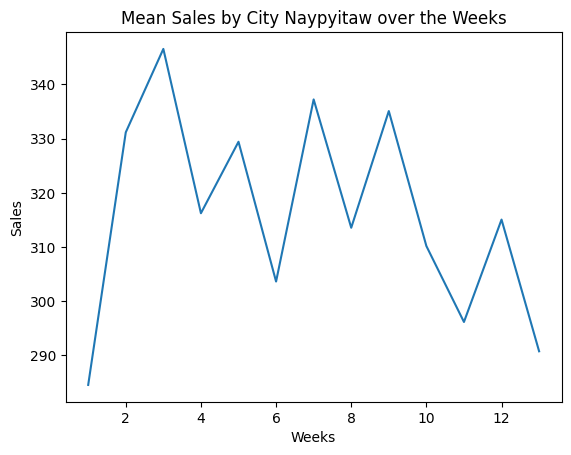

In [32]:
# generic testing plots
fig = ploter(30, 'City', 'Naypyitaw', 'Weeks')
plt.show()

<Axes: ylabel='Density'>

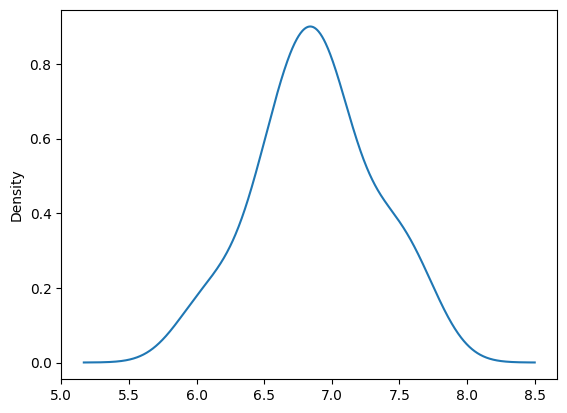

In [94]:
# analysing rating features
data.groupby(data.index.day).mean(numeric_only=True)['Rating'].plot(kind='kde')

In [84]:
data['Rating'].min(), data['Rating'].max()

(4.0, 10.0)

In [33]:
# mean rating received by customer
data.groupby(data.index.day).mean(numeric_only=True)['Rating'].mean()

6.967669318403016

# Production Streamlit Application


In [ ]:
# main

import streamlit as st
from streamlit_star_rating import st_star_rating
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sb
from helper_functions import ploter, data_prep

def main():
  # raw data overview
  st.markdown("<h1 style='text-align: center;'> Raw Data </h1>", unsafe_allow_html=True)

  # loading data
  data = pd.read_csv('Sales_Dashboard/production_files/data.xls')
  st.write(data)
  st.write('---')


  # main dashboard title
  st.write("""
        #
        """)
  st.markdown("<h1 style='text-align: center;'> Interactive Sales Dashboard </h1>", unsafe_allow_html=True)

  st.write('---')

  # Selecting params for visualizations
  # smoothing level
  st.markdown("<h2 style='text-align: center;'> Smoothing the sales </h2>", unsafe_allow_html=True)

  smooth = st.slider('Smoothing level', min_value=1, max_value=90, value=30, step=1)

  st.write('---')

  # features vs time horizon
  st.markdown("<h2 style='text-align: center;'> Features vs Time Horizon Sales Analysis </h2>", unsafe_allow_html=True)

  col1, col2, col3 = st.columns(3)
  with col1:
          feat_list = ['City', 'Customer type', 'Gender', 'Product line', 'Payment']
          features = st.selectbox('Features:', feat_list)

  with col2:
          Sub_features = st.selectbox('Sub features:', data[features].unique())

  with col3:
          time_horizon = st.selectbox('Time Horizon', ('Working hours', 'Days of Week', 'Weeks', 'Days of Month','Months'))

  submit = st.button('Analyse the Data', use_container_width=True)

  if submit:
    fig, stars = ploter(smooth, features, Sub_features, time_horizon)
    st.pyplot(fig)

    st.write('---')

    # Customer Satisfaction
    st.markdown("<h2 style='text-align: center;'> Customer Satisfaction Rating </h2>", unsafe_allow_html=True)

    star = st_star_rating('', 10, stars, 60, None, None, None,
                          None, None, None, None)






if __name__ == '__main__':
  main()

In [ ]:
# helper functions
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sb

def data_prep(data):
  '''
  preprocessing raw data
  '''

  clean_data = data[['City', 'Customer type', 'Gender', 'Product line', 'Total', 'Date', 'Time', 'Payment', 'Rating']].copy()
  clean_data['DateTime'] = clean_data['Date']+ 'T' +clean_data['Time']
  clean_data['DateTime'] = pd.to_datetime(clean_data['DateTime'])
  clean_data.drop(columns=['Date', 'Time'], inplace=True)
  clean_data['Rating'] = clean_data['Rating'].round(0)
  clean_data = clean_data.set_index('DateTime').sort_index()

  return clean_data

def ploter(smooth, feat, sub_feat, time_horizon):
  '''
  helper function to plot sales according to
   - smoothing level
   - categorical feature & sub feature of choice
   - time horizon
  '''

  dataset = data_prep(data)
  dataset['Total Sales'] = dataset['Total'].rolling(smooth).mean()
  dataset.dropna(inplace=True)

  time_dict = {
  'Working hours': dataset.index.hour,
  'Days of Week': dataset.index.dayofweek,
  'Weeks': dataset.index.isocalendar().week,
  'Days of Month': dataset.index.day,
  'Months': dataset.index.month
            }

  fig, ax = plt.subplots()
  ax = dataset.where(dataset[feat] == sub_feat).groupby(time_dict[time_horizon]).mean(numeric_only=True)['Total Sales'].plot()
  stars = dataset.where(dataset[feat] == sub_feat).groupby(time_dict[time_horizon]).mean(numeric_only=True)['Rating'].mean().round(0)
  ax.set_xlabel(time_horizon)
  ax.set_ylabel('Sales')
  ax.set_title('Mean Sales by %s %s over the %s' %(sub_feat, feat, time_horizon))
  return fig, stars

# loading data
data = pd.read_csv('Sales_Dashboard/production_files/data.xls')

In [ ]:
# requirements file
streamlit
st-star-rating
numpy
pandas
matplotlib
seaborn
plotly
datetime
